In [305]:
from sklearn.utils import resample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [319]:
train=pd.read_csv('/home/vinay/Downloads/HDFC_ML/DataSet/Train.csv')
test=pd.read_csv('/home/vinay/Downloads/HDFC_ML/DataSet/Test.csv')

/home/vinay/anaconda3/envs/tensor/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/vinay/anaconda3/envs/tensor/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [320]:
trainobjects = train.select_dtypes(include=[object])
testobjects = test.select_dtypes(include=[object])
rcolumns=trainobjects+testobjects
#y=train['Col2']
train=train.drop(columns=rcolumns.columns)
#x=train
train.fillna(0, inplace=True)

In [321]:
train.Col2.value_counts()

0    15760
1     1761
Name: Col2, dtype: int64

In [322]:
testid=test['Col1']
test=test.drop(columns=rcolumns.columns)
test.fillna(0, inplace=True)

In [323]:
train_majority = train[train.Col2==0]
train_minority = train[train.Col2==1]
 
# Upsample minority class
train_minority_upsampled = resample(train_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=4000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_minority, train_minority_upsampled])
 
# Display new class counts
train_upsampled.Col2.value_counts()

0    4000
1    1761
Name: Col2, dtype: int64

In [324]:
y=train_upsampled['Col2']
train_upsampled.drop('Col2', axis=1, inplace=True)
x=train_upsampled

In [325]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,stratify=y) # 70% training and 30% test

In [235]:
param_grid = {'n_estimators': [300],'max_depth': np.arange(1,40)
             }
clf=RandomForestClassifier(n_jobs=-1)
#clf=SVC(kernel='linear', class_weight='balanced', probability=True)
#clf.fit(x_train,y_train)
cv = GridSearchCV(clf, param_grid,n_jobs=-1,scoring='roc_auc',verbose=10)
cv.fit(x, y)
print(cv.best_params_)
print(cv.best_score_)

/home/vinay/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 39 candidates, totalling 117 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed: 16.7min finished


{'max_depth': 4, 'n_estimators': 300}
0.5992733290597542


In [326]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
x = StandardScaler().fit_transform(x)

In [327]:
#y_pred=clf.predict(x_test)
clf1=RandomForestClassifier(n_jobs=-1,n_estimators=300,max_depth=15,criterion='entropy')
clf1.fit(x_train,y_train)
y_pred=clf1.predict(x_test)

In [328]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print(precision_recall_fscore_support(y_test,y_pred,average='macro'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print(auc(false_positive_rate, true_positive_rate))

Accuracy: 0.7279666897987509
(0.702739650818052, 0.5838411588411588, 0.576925611911681, None)
              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1001
           1       0.67      0.21      0.32       440

    accuracy                           0.73      1441
   macro avg       0.70      0.58      0.58      1441
weighted avg       0.71      0.73      0.68      1441

[[955  46]
 [346  94]]
0.5838411588411588


In [329]:
y_pred_prob=clf1.predict_proba(x_test)
y_prob = [p[1] for p in y_pred_prob]
print( roc_auc_score(y_test, y_prob))

0.7109594950504042


In [330]:
result=clf1.predict(test)

In [331]:
#zero=one=0
#for val in result:
#    if val==0:
#        zero+=1
#    else:
#        one+=1
#print("Zeros  :",zero)
#print("Ones   :",one)

In [332]:
unique, counts = np.unique(result, return_counts=True)
print (np.asarray((unique, counts)).T)

[[    0 16615]
 [    1  3827]]


In [261]:
predictions=np.asarray([testid,result])
predictions=predictions.T
df=pd.DataFrame(predictions,columns=['Col1','Col2'])
df.to_csv("/home/vinay/Downloads/HDFC_ML/DataSet/Predictionsfullset8.csv",index=False)

In [ ]:
tune more the random forest
smote 
naive bayes 
xgboost
    auc thresold
svm
    classweights
50

In [301]:
falsepos=list()
aucscore=list()
rocaucscore=list()
test1counts=list()
maxdepth=list(range(10,20))
i=1
for val in maxdepth:
    clf1=RandomForestClassifier(n_jobs=-1,n_estimators=300,max_depth=val,criterion='entropy')
    clf1.fit(x,y)
    y_pred=clf1.predict(x_test)
    #print("Accuracy:",accuracy_score(y_test, y_pred))
    #print(precision_recall_fscore_support(y_test,y_pred,average='macro'))
    #print(classification_report(y_test,y_pred))
    print("Iteration:",i)
    i+=1
    print(confusion_matrix(y_test,y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    #print(auc(false_positive_rate, true_positive_rate))
    y_pred_prob=clf1.predict_proba(x_test)
    y_prob = [p[1] for p in y_pred_prob]
    #print( roc_auc_score(y_test, y_prob))
    result=clf1.predict(test)
    unique, counts = np.unique(result, return_counts=True)
    print (np.asarray((unique, counts)).T)
    falsepos.append(confusion_matrix(y_test,y_pred)[1][0])
    aucscore.append(auc(false_positive_rate, true_positive_rate))
    rocaucscore.append(roc_auc_score(y_test, y_prob))
    test1counts.append((np.asarray((unique, counts)).T)[1][1])
    predictions=np.asarray([testid,result])
    predictions=predictions.T
    df=pd.DataFrame(predictions,columns=['Col1','Col2'])
    df.to_csv("/home/vinay/Downloads/HDFC_ML/DataSet/Predictionsfullsetmaxdepthset2"+str(val)+".csv",index=False)

Iteration: 1
[[1591    0]
 [ 295  233]]
[[    0 19642]
 [    1   800]]
Iteration: 2
[[1591    0]
 [ 246  282]]
[[    0 19614]
 [    1   828]]
Iteration: 3
[[1591    0]
 [ 209  319]]
[[    0 19610]
 [    1   832]]
Iteration: 4
[[1591    0]
 [ 156  372]]
[[    0 19569]
 [    1   873]]
Iteration: 5
[[1591    0]
 [ 116  412]]
[[    0 19532]
 [    1   910]]
Iteration: 6
[[1591    0]
 [  78  450]]
[[    0 19541]
 [    1   901]]
Iteration: 7
[[1591    0]
 [  60  468]]
[[    0 19510]
 [    1   932]]
Iteration: 8
[[1591    0]
 [  52  476]]
[[    0 19490]
 [    1   952]]
Iteration: 9
[[1591    0]
 [  45  483]]
[[    0 19469]
 [    1   973]]
Iteration: 10
[[1591    0]
 [  42  486]]
[[    0 19508]
 [    1   934]]


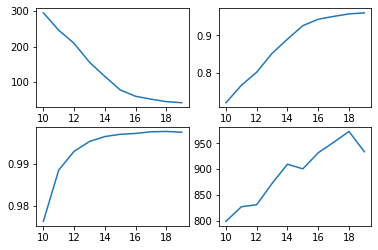

In [302]:
fig, ax = plt.subplots(nrows=2, ncols=2)
plotvalues=[falsepos,aucscore,rocaucscore,test1counts]
i=0
for row in ax:
    for col in row:
        col.plot(maxdepth,plotvalues[i])
        i+=1
plt.show()